## Homework 4
Question 1a)

logistic function = p(X) = e^(β0 + β1X) / (1 + e^(β0 + β1X))
log [p(X) / (1 - p(X))] = log [e^(β0 + β1X) / (1 + e^(β0 + β1X))]
log [e^(β0 + β1X)] - log(1 + e^(β0 + β1X))
(β0 + β1X) - log(1 + e^(β0 + β1X))
log [p(X) / (1 - p(X))] = β0 + β1X

Question 1b)

In [1]:
# Probability = Odds/(Odds + 1)
prob = .37 / (.37 + 1)
prob_frac = prob * 100
print(f'The fraction of players with an odds of .37 losing the tournament is {prob_frac:.2f}/100.')

The fraction of players with an odds of .37 losing the tournament is 27.01/100.


Question 1c)

In [2]:
# Odds = Probability / (1-Probability)
odds = .16 / (1-.16)
print(f'The odds of an individual losing a tournament with a probability of .16 is {odds:.2f}.')

The odds of an individual losing a tournament with a probability of .16 is 0.19.


Question 2-1a)

In [30]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
plt.style.use('seaborn-white')

# Trick to widen the screen
from IPython.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

import warnings
warnings.filterwarnings("ignore") 


In [4]:
# read in the file and print the first five rows
df_cs = pd.read_csv(r"C:\Users\Katabatic\Desktop\DATA 3550\Carseats.csv")
df_cs.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesDir
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4,141,64,3,340,128,Bad,38,13,Yes,No,0


In [5]:
# print the info
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   400 non-null    int64 
 1   CompPrice    400 non-null    int64 
 2   Income       400 non-null    int64 
 3   Advertising  400 non-null    int64 
 4   Population   400 non-null    int64 
 5   Price        400 non-null    int64 
 6   ShelveLoc    400 non-null    object
 7   Age          400 non-null    int64 
 8   Education    400 non-null    int64 
 9   Urban        400 non-null    object
 10  US           400 non-null    object
 11  SalesDir     400 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 37.6+ KB


In [6]:
# we're not missing any values in any of the columns, but we need to convert ShelveLoc, Urban, and US to dummy variables. Unnamed appears to be another index column, so we need to remove it. 
df_cs = df_cs.drop(['Unnamed: 0'], axis = 1)
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  SalesDir     400 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 34.5+ KB


In [7]:
# create the dummy variables
dummies = pd.get_dummies(df_cs[['ShelveLoc', 'Urban', 'US']]) 
dummies.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0


In [8]:
#drop the old columns
df_cs= df_cs.drop(['ShelveLoc', 'Urban', 'US'], axis = 1)
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   Age          400 non-null    int64
 6   Education    400 non-null    int64
 7   SalesDir     400 non-null    int64
dtypes: int64(8)
memory usage: 25.1 KB


In [9]:
# concat the dummies and df
df_cs = pd.concat([df_cs, dummies], axis = 1)
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int64
 1   Income            400 non-null    int64
 2   Advertising       400 non-null    int64
 3   Population        400 non-null    int64
 4   Price             400 non-null    int64
 5   Age               400 non-null    int64
 6   Education         400 non-null    int64
 7   SalesDir          400 non-null    int64
 8   ShelveLoc_Bad     400 non-null    uint8
 9   ShelveLoc_Good    400 non-null    uint8
 10  ShelveLoc_Medium  400 non-null    uint8
 11  Urban_No          400 non-null    uint8
 12  Urban_Yes         400 non-null    uint8
 13  US_No             400 non-null    uint8
 14  US_Yes            400 non-null    uint8
dtypes: int64(8), uint8(7)
memory usage: 27.9 KB


Question 2-1b)

In [10]:
# assign x and y

X = df_cs.drop(columns=["SalesDir"])  
y = df_cs["SalesDir"]  

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# standardize the X_train and X_test
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

Question 2-2a)

In [12]:
# fit the model
logistic_initial = LogisticRegression(max_iter = 10000, random_state = 42)
logistic_initial.fit(X_train_sc, y_train)


LogisticRegression(max_iter=10000, random_state=42)

Question 2-2b)

In [13]:
y_train_pred = logistic_initial.predict(X_train_sc)

# calculate accuracy, precision, and recall scores
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)

# print out the results
print("Training Accuracy:", accuracy)
print("Training Precision:", precision)
print("Training Recall:", recall)

Training Accuracy: 0.9107142857142857
Training Precision: 0.9291338582677166
Training Recall: 0.8805970149253731


In [14]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[137,   9],
       [ 16, 118]], dtype=int64)

Question 2-2c)

In [15]:
# Predict on the test data
y_test_pred = logistic_initial.predict(X_test_sc)

# Calculate accuracy, precision, and recall scores for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[46,  9],
       [ 6, 59]], dtype=int64)

In [16]:
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)


Test Accuracy: 0.875
Test Precision: 0.8676470588235294
Test Recall: 0.9076923076923077


There is not a huge difference between our training results and testing results. Our accuracy and precision went down, but our recall actually went up which means we are making less type 2 errors.

In [17]:
probability_scores = logistic_initial.predict_proba(X_test_sc)

# The result is a 2D array with two columns: probability of class 0 and probability of class 1
# Column 0: Probability of below average sales
# Column 1: Probability of above average sales

# Example: Printing the first few rows of probability scores
print("Probability Scores for Below Average Sales (Class 0):")
print(probability_scores[:5, 0])

print("Probability Scores for Above Average Sales (Class 1):")
print(probability_scores[:5, 1])

Probability Scores for Below Average Sales (Class 0):
[0.98057035 0.99692997 0.2318765  0.98725538 0.06822085]
Probability Scores for Above Average Sales (Class 1):
[0.01942965 0.00307003 0.7681235  0.01274462 0.93177915]


In [18]:
# Calculate the probability scores for Class 1 (above average sales)
probability_scores_class1 = logistic_initial.predict_proba(X_test_sc)[:, 1]

# Calculate the probability scores for Class 0 (below average sales)
probability_scores_class0 = logistic_initial.predict_proba(X_test_sc)[:, 0]

# Set classification threshold (e.g., 0.5)
threshold = 0.5

# Make predictions based on the threshold
predicted_values = (probability_scores_class1 >= threshold).astype(int)

# Create the df_results data frame
df_results = pd.DataFrame({
    'y_test': y_test,
    'Probability_Above_Average': probability_scores_class1,
    'Probability_Below_Average': probability_scores_class0,
    'Predicted_Values': predicted_values
})

# Display the first few rows of the df_results data frame
df_results.head()

,y_test,Probability_Above_Average,Probability_Below_Average,Predicted_Values
209,0,0.019430,0.980570,0
280,0,0.003070,0.996930,0
33,1,0.768124,0.231876,1
210,0,0.012745,0.987255,0
93,1,0.931779,0.068221,1


Question 2-3a-c)

In [19]:
# Define a grid of hyperparameters to test
grid = {
    "C": np.arange(0.001, 10, 0.001),#[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 30, 40, 50, 100, 200]
    "penalty": ["l1", "l2"],
    "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
# Initialize a logistic regression model with a random state of 42
logreg = LogisticRegression(random_state=42, max_iter = 10000)

# Use RandomizedSearchCV to perform a randomized search over the grid of hyperparameters, using a 10-fold cross-validation
logreg_cv = RandomizedSearchCV(logreg, grid, cv=10, random_state=42)

# Fit the model to the training data
logreg_cv.fit(X_train_sc, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Tuned hyperparameters: (best parameters)", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters: (best parameters) {'solver': 'sag', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 6.098000000000001}
Accuracy: 0.8892857142857142


Question 2-4a)

In [20]:
# Extract the best hyperparameters
best_C = logreg_cv.best_params_['C']
best_penalty = logreg_cv.best_params_['penalty']
best_class_weight = logreg_cv.best_params_['class_weight']
best_solver = logreg_cv.best_params_['solver']

# Create a logistic regression model with the best hyperparameters
logistic_best = LogisticRegression(
    C=best_C,
    penalty=best_penalty,
    class_weight=best_class_weight,
    solver=best_solver,
    random_state=42,  # You can set the random state if needed
    max_iter=10000  # You can adjust max_iter as necessary
)

# Fit the model to the training data
logistic_best.fit(X_train_sc, y_train)

LogisticRegression(C=6.098000000000001, class_weight='balanced', max_iter=10000,
                   random_state=42, solver='sag')

Question 2-4b)

In [21]:
# Predict the response on the test data using the best model
y_pred_best = logistic_best.predict(X_test_sc)

# Create a confusion matrix
confusion_matrix_best = confusion_matrix(y_test, y_pred_best)
confusion_matrix_best

array([[46,  9],
       [ 4, 61]], dtype=int64)

Question 2-4c)

In [22]:

# Calculate accuracy, precision, and recall scores for the test data
accuracy_test = accuracy_score(y_test, y_pred_best)
precision_test = precision_score(y_test, y_pred_best)
recall_test = recall_score(y_test, y_pred_best)

print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)

Test Accuracy: 0.8916666666666667
Test Precision: 0.8714285714285714
Test Recall: 0.9384615384615385


Question 2-4d)

In [23]:
# The code blow builds the dataframe that enables us to easily build the barplot of coefficients
best_coef = logistic_best.coef_
df_best_coef = pd.DataFrame(best_coef)
names = X.columns 
df_best_coef.columns = names 

#transpose the data frame for better view
df_best_coef = df_best_coef.T 

# renaming the column of the cefficient to logreg_coefficient
df_best_coef = df_best_coef.rename(columns = {0:'logreg_coeff'}) 

df_best_coef = df_best_coef.sort_values('logreg_coeff')

df_best_coef = df_best_coef.reset_index()
df_best_coef = df_best_coef.rename(columns = {'index':'Variable_Names', 'logreg_coeff':'logreg_coeff'})
df_best_coef

,Variable_Names,logreg_coeff
0,Price,-4.722449
1,ShelveLoc_Bad,-1.520345
2,Age,-1.459314
3,ShelveLoc_Medium,-0.199367
4,US_Yes,-0.192944
5,Education,-0.161909
6,Urban_No,-0.065738
7,Urban_Yes,0.065738
8,Population,0.163409
9,US_No,0.192944


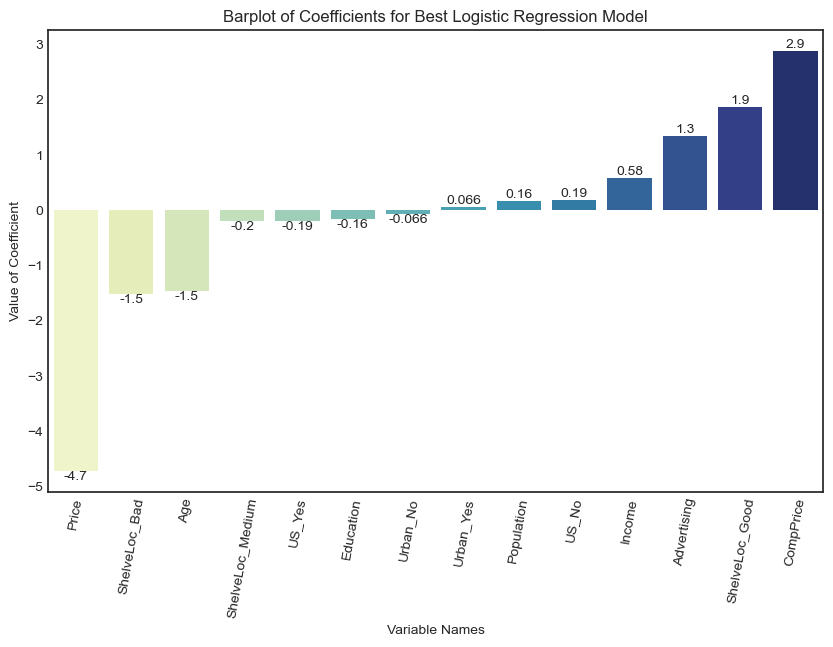

In [24]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x="Variable_Names",y="logreg_coeff",data=df_best_coef, palette ="YlGnBu")
plot.bar_label(plot.containers[0], fmt='%.2g')

plt.xticks(rotation=80)
plt.title('Barplot of Coefficients for Best Logistic Regression Model')
plt.xlabel('Variable Names')
plt.ylabel('Value of Coefficient')
plt.show()

Question 2-4e)

In [25]:
# Predict the probability for each class (0 and 1) on the test data
probability_scores = logistic_best.predict_proba(X_test_sc)

# Extract the probability scores for class 0 and class 1
prob_below_average = probability_scores[:, 0]
prob_above_average = probability_scores[:, 1]

# Create a DataFrame to store the results
df_best_results = pd.DataFrame({
    'y test': y_test,
    'Probability Below Average': prob_below_average,
    'Probability Above Average': prob_above_average,
    'Predicted Values': y_pred_best
})

# Display the DataFrame
df_best_results.head()

,y test,Probability Below Average,Probability Above Average,Predicted Values
209,0,0.993607,0.006393,0
280,0,0.999621,0.000379,0
33,1,0.166201,0.833799,1
210,0,0.996676,0.003324,0
93,1,0.016559,0.983441,1


If we compare the confusion matricies, we notice that the best model has reduced our type two errors and therefore imporved our recall. This means that the best model is better at identifying above average sales than the first model. Our accuracy also improved because we are making less type two errors and type one errors stayed the same. 

Question 2-5a)

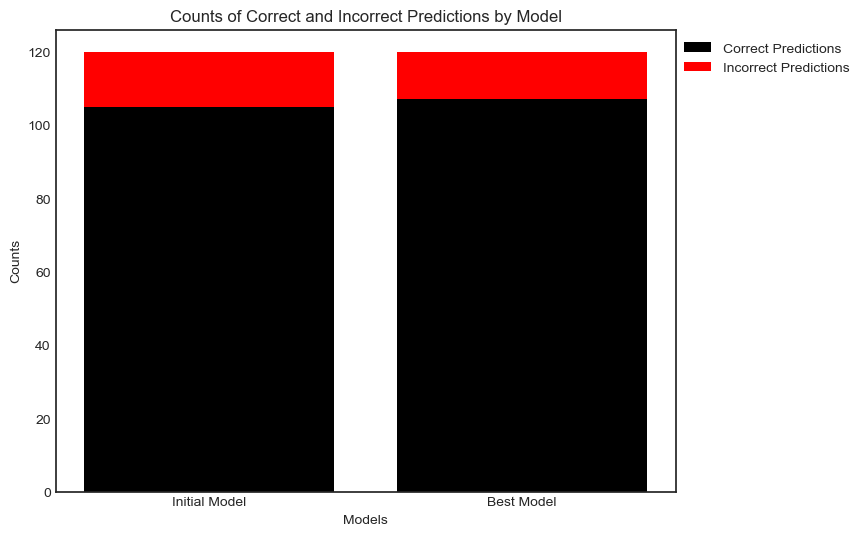

In [27]:


# Define data for the counts of correct and incorrect predictions for each model
correct_counts = [105, 107]
incorrect_counts = [15, 13]

# Define labels for the models
models = ["Initial Model", "Best Model"]

# Create a stacked bar diagram
plt.figure(figsize=(8, 6))
plt.bar(models, correct_counts, label='Correct Predictions', color='black')
plt.bar(models, incorrect_counts, bottom=correct_counts, label='Incorrect Predictions', color='red')

# Add labels and legend
plt.xlabel("Models")
plt.ylabel("Counts")
plt.title("Counts of Correct and Incorrect Predictions by Model")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# Show the plot
plt.show()

Question 2-5b)

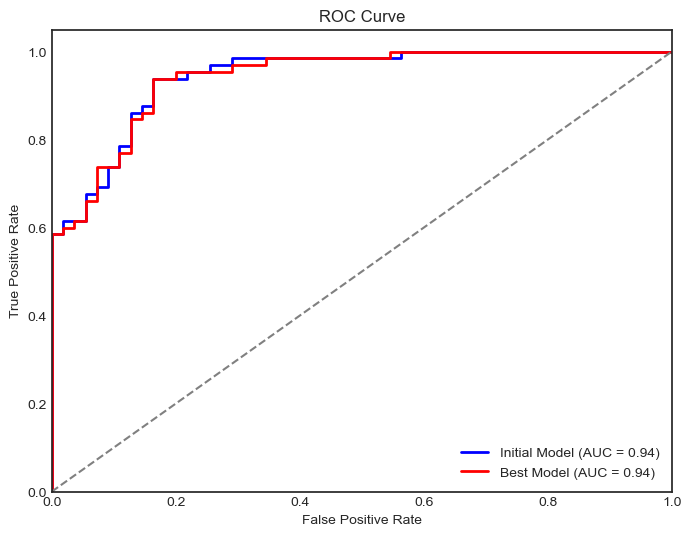

In [33]:
# Calculate ROC curve for the initial model
fpr_initial, tpr_initial, _ = roc_curve(y_test, logistic_initial.predict_proba(X_test_sc)[:, 1])
roc_auc_initial = roc_auc_score(y_test, logistic_initial.predict_proba(X_test_sc)[:, 1])

# Calculate ROC curve for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, logistic_best.predict_proba(X_test_sc)[:, 1])
roc_auc_best = roc_auc_score(y_test, logistic_best.predict_proba(X_test_sc)[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_initial, tpr_initial, color='blue', lw=2, label=f'Initial Model (AUC = {roc_auc_initial:.2f})')
plt.plot(fpr_best, tpr_best, color='red', lw=2, label=f'Best Model (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

We want the the highest area under the curve (AUC). Since both of our models' performances were very close to each other, we see that their AUCs are very close to eachother. 